### 1.문제정의
- iris 데이터에 scaler를 사용해보기

### 2.데이터 수집

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### 3.데이터 전처리
- 데이터의 구조 확인

In [3]:
x = iris['data']
y = iris['target']

In [4]:
x
y
x.shape, y.shape

((150, 4), (150,))

#### 3-1.데이프레임 형태로 변환하기

In [5]:
df = pd.DataFrame(x, columns=iris['feature_names'])

# 컬럼 이름 바꾸기
df.columns = ['sepal length',
                'sepal width',
                'petal length',
                'petal width']

#### 3-2.스케일러 적용하기

In [27]:
from sklearn.svm import SVC
svc = SVC()

import module_Score as MS
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = MS.ND_Standard(x, y, 0)
MS.YD_score(svc, X_train, X_test, y_train, y_test)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
x_scaled = scaler.transform(df)
scale_df = pd.DataFrame(x_scaled, columns=iris['feature_names'])
# scale_df.head()

============== SVC()의 정확도===============
학습데이터 정확도 : 0.9732142857142857
테스트데이터 정확도 : 0.9736842105263158



### 4.EDA(탐색적 분석)
- 시각화를 하거나 데이터를 파악하고 분석

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale = 1.2)

<AxesSubplot:>

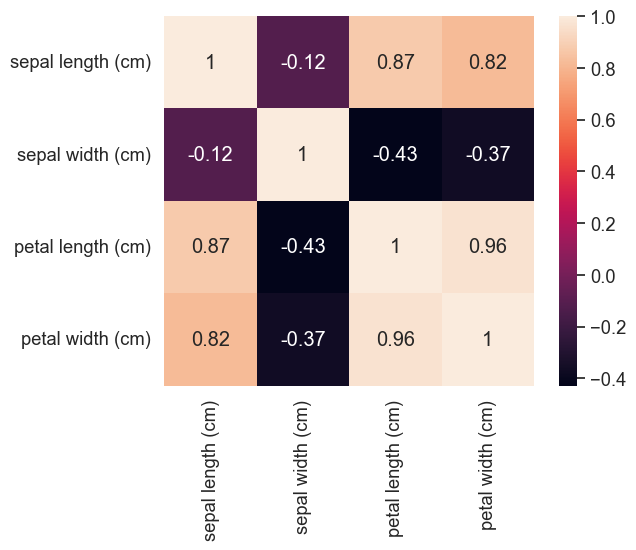

In [29]:
sns.heatmap(data=scale_df.corr(), square=True, annot=True)

### 5.모델링(모델선택, 학습, 평가)

![image](https://user-images.githubusercontent.com/87592790/197911252-d881cddc-4e21-4ded-9aec-76eca20c2762.png)


KNeighborsClassifierm

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# 예측과 accuracy따로
pred = knn.predict(X_test)
knn.score(X_test, y_test)
# 예측과 평가 같이
from sklearn.metrics import accuracy_score
add = accuracy_score(y_test, pred)
add, knn.score(X_test, y_test)


(0.9736842105263158, 0.9736842105263158)

LogisticRegressionm

In [31]:
from sklearn.linear_model import LogisticRegression
LogisticRegression = LogisticRegression()
LogisticRegression.fit(X_train, y_train)
# 예측과 accuracy따로
pred=LogisticRegression.predict(X_test)
print(LogisticRegression.score(X_test, y_test))
add = accuracy_score(y_test, pred)
print(add)

#predict_proba 사용하면 각 클래스의 속한 확률값을 예측할 수 있다
prob=LogisticRegression.predict_log_proba(X_test)
prob

0.9736842105263158
0.9736842105263158


array([[-8.96504595e+00, -3.53269217e+00, -2.97933754e-02],
       [-5.16286589e+00, -4.70827246e-02, -3.21224144e+00],
       [-4.20951033e-03, -5.47252521e+00, -1.67833097e+01],
       [-1.07393958e+01, -2.53099573e+00, -8.29484579e-02],
       [-2.35910243e-02, -3.75868818e+00, -1.42825152e+01],
       [-1.03063476e+01, -4.67371473e+00, -9.41512241e-03],
       [-1.63654703e-02, -4.12078191e+00, -1.45792376e+01],
       [-5.04687677e+00, -3.27604541e-01, -1.29856679e+00],
       [-6.15061162e+00, -3.09365141e-01, -1.33197633e+00],
       [-3.83482180e+00, -1.07069201e-01, -2.52658757e+00],
       [-6.66235119e+00, -8.21707788e-01, -5.81531157e-01],
       [-3.92594124e+00, -2.64106818e-01, -1.54935496e+00],
       [-4.34438098e+00, -1.51815667e-01, -2.05671125e+00],
       [-5.58829782e+00, -3.57998786e-01, -1.21340150e+00],
       [-4.39575571e+00, -2.82225034e-01, -1.45428855e+00],
       [-8.37742408e-03, -4.78641419e+00, -1.59914244e+01],
       [-4.20224521e+00, -3.22573133e-01

DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier = DecisionTreeClassifier()
DecisionTreeClassifier.fit(X_train, y_train)
# 예측과 accuracy따로
pred=DecisionTreeClassifier.predict(X_test)
print(DecisionTreeClassifier.score(X_test, y_test))
add = accuracy_score(y_test, pred)
print(add)

0.9736842105263158
0.9736842105263158


Support Vector Machine

In [33]:

from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
pred2 = svc.predict(X_test)
print(svc.score(X_test,y_test))
print(accuracy_score(y_test, pred2))

0.9736842105263158
0.9736842105263158
